## Load a random vector with the divide-and-conquer state preparation.

In [1]:
import base.encoding
import qiskit

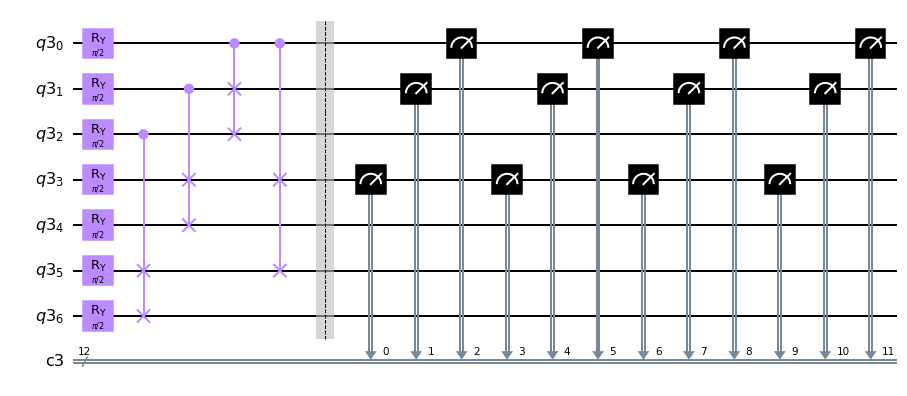

In [6]:
input_vector = [1]*8

encode = base.encoding.Encoding(input_vector, 'dc_amplitude_encoding')
output = qiskit.ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()

for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')
# visualization.circuit_drawer(encode.qcircuit, filename="circuit1", scale=5, output='mpl', style={'backgroundcolor': '#FFFFFF'})

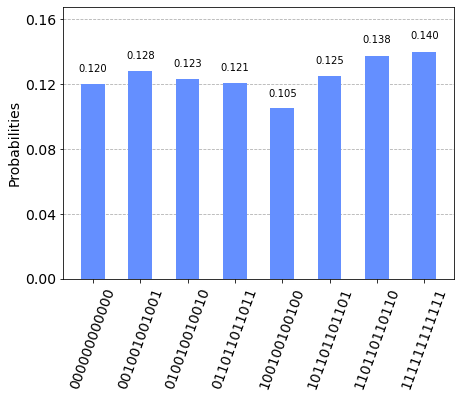

In [9]:
counts = qiskit.execute(encode.qcircuit, backend = qiskit.Aer.get_backend('qasm_simulator')).result().get_counts()
qiskit.visualization.plot_histogram(counts)